# 普通最小平方法
### 中電會三月主題課程(2024/3/23)

<table class="tfo-notebook-buttons" align="left">
  <td>
  <td>
    <a target="_blank" href="https://colab.research.google.com/github/ChiuDeYuan/linear_regression_example/blob/main/housing_price_OLS.ipynb"><img src="https://www.tensorflow.org/images/colab_logo_32px.png" />Run in Google Colab</a>
  </td>
  <td>
    <a target="_blank" href="https://github.com/ChiuDeYuan/linear_regression_example/blob/main/housing_price_OLS.ipynb"><img src="https://www.tensorflow.org/images/GitHub-Mark-32px.png" />View on GitHub</a>
  </td>
</table>

## Useful links

* Housing Prices Dataset : https://www.kaggle.com/datasets/yasserh/housing-prices-dataset
* Linear Models (Scikit-learn) : https://scikit-learn.org/stable/modules/linear_model.html

## Imports

In [1]:
from sklearn import linear_model
from sklearn.metrics import r2_score
from sklearn.utils import shuffle

In [2]:
import statsmodels.api as sm

In [3]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

## Loads data

In [4]:
dataset_path = 'https://raw.githubusercontent.com/ChiuDeYuan/linear_regression_example/main/Housing.csv'
dataset = pd.read_csv(dataset_path)

In [5]:
dataset.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [6]:
dataset.shape

(545, 13)

## 準備資料



In [7]:
dataset_x = dataset[['area']]
dataset_y = dataset[['price']]

In [8]:
dataset_x.head()

,area
0,7420
1,8960
2,9960
3,7500
4,7420


In [9]:
dataset_y.head()

,price
0,13300000
1,12250000
2,12250000
3,12215000
4,11410000


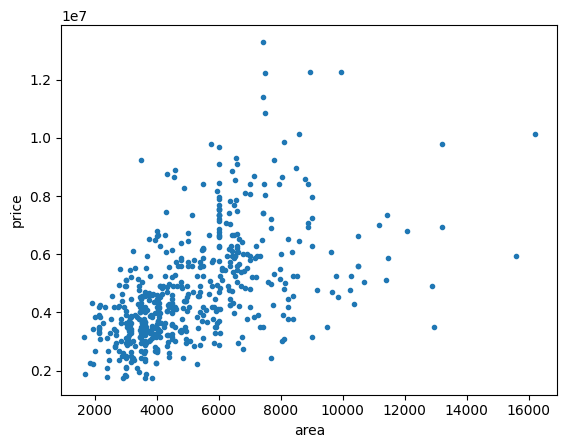

In [10]:
plt.xlabel("area")
plt.ylabel("price")
plt.plot(dataset_x, dataset_y, '.')

In [11]:
dataset_x = sm.add_constant(dataset_x)

In [12]:
dataset_x.head()

,const,area
0,1.0,7420
1,1.0,8960
2,1.0,9960
3,1.0,7500
4,1.0,7420


## 分割資料集

In [13]:
dataset_x, dataset_y = shuffle(dataset_x, dataset_y, random_state=0)

In [14]:
dataset_x_train = dataset_x[:-30]
dataset_x_test = dataset_x[-30:]

dataset_y_train = dataset_y[:-30]
dataset_y_test = dataset_y[-30:]

In [15]:
print(f"{dataset_x_train.shape}\n{dataset_x_test.shape}")

(515, 2)
(30, 2)


## 訓練模型

In [16]:
reg = sm.OLS(dataset_y_train,dataset_x_train).fit()

## 預測&評估

In [17]:
print(reg.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.294
Model:                            OLS   Adj. R-squared:                  0.293
Method:                 Least Squares   F-statistic:                     213.5
Date:                Sun, 17 Mar 2024   Prob (F-statistic):           1.10e-40
Time:                        14:22:09   Log-Likelihood:                -8079.7
No. Observations:                 515   AIC:                         1.616e+04
Df Residuals:                     513   BIC:                         1.617e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       2.362e+06   1.78e+05     13.270      0.0

In [18]:
prediction = reg.predict(dataset_x_test)

In [19]:
r2_score(dataset_y_test, prediction)

0.1499169403062125

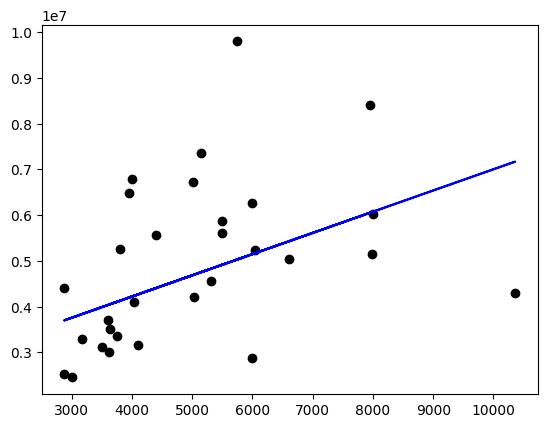

In [27]:
plt.scatter(dataset_x_test['area'], dataset_y_test, color="black")
plt.plot(dataset_x_test['area'], prediction, color="blue")
plt.show()